<a href="https://colab.research.google.com/github/Khansa-Gulshad/geopandas/blob/main/Copy_of_geopandas_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas fiona shapely pyproj rtree

In [ ]:
!pip install sodapy

In [ ]:
!pip install geopandas

In [ ]:
!pip install contextily

In [ ]:
!pip install esda

In [ ]:
!pip install splot

In [ ]:
!pip install spatial_access
!pip install rtree

In [8]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [50]:
gdf=gpd.read_file('/content/drive/MyDrive/geopandas_exercise/acs2019_5yr_B01003_15000US060371992011.geojson')

In [51]:
gdf.head()

geoid                            name  B01003001  \
0  15000US060371011101  Block Group 1, Los Angeles, CA     1688.0   
1  15000US060371011102  Block Group 2, Los Angeles, CA     1614.0   
2  15000US060371011103  Block Group 3, Los Angeles, CA      981.0   
3  15000US060371011221  Block Group 1, Los Angeles, CA     2156.0   
4  15000US060371011222  Block Group 2, Los Angeles, CA     1249.0   

   B01003001, Error                                           geometry  
0             337.0  MULTIPOLYGON (((-118.29133 34.26008, -118.2913...  
1             341.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2             288.0  MULTIPOLYGON (((-118.30080 34.26327, -118.2979...  
3             388.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
4             313.0  MULTIPOLYGON (((-118.29075 34.26906, -118.2906...

In [52]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2516 non-null   object  
 1   name              2516 non-null   object  
 2   B01003001         2516 non-null   float64 
 3   B01003001, Error  2516 non-null   float64 
 4   geometry          2516 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 98.4+ KB


In [53]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
gdf=gdf[['geoid','B01003001','geometry']]

In [55]:
gdf.columns=['FIPS','TotalPopu','geometry']

In [56]:
gdf.tail()

FIPS  TotalPopu  \
2511  15000US060379800261       26.0   
2512  15000US060379800281        0.0   
2513  15000US060379800311     1175.0   
2514  15000US060379902000        0.0   
2515       16000US0644000  3966936.0   

                                               geometry  
2511  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
2512  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
2513  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
2514  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  
2515  MULTIPOLYGON (((-118.66818 34.18987, -118.6681...

In [57]:
gdf=gdf.drop(2515)

In [58]:
gdf['FIPS']=gdf['FIPS'].str.replace('15000US','')
gdf.tail()

FIPS  TotalPopu  \
2510  060379800241      223.0   
2511  060379800261       26.0   
2512  060379800281        0.0   
2513  060379800311     1175.0   
2514  060379902000        0.0   

                                               geometry  
2510  MULTIPOLYGON (((-118.51849 34.18389, -118.5184...  
2511  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
2512  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
2513  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
2514  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...

In [59]:
gdf.sort_values(by='TotalPopu').head(20)

FIPS  TotalPopu  \
2514  060379902000        0.0   
2358  060372772002        0.0   
2512  060379800281        0.0   
2509  060379800231        0.0   
2506  060379800201        0.0   
2508  060379800221        0.0   
2501  060379800091        5.0   
2503  060379800141        9.0   
2511  060379800261       26.0   
2507  060379800211       33.0   
2500  060379800081       68.0   
2499  060379302002       94.0   
2502  060379800101       95.0   
2505  060379800191      138.0   
1482  060372145033      163.0   
2360  060372774002      220.0   
2510  060379800241      223.0   
1868  060372371013      288.0   
889   060371835101      329.0   
1706  060372283104      337.0   

                                               geometry  
2514  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  
2358  MULTIPOLYGON (((-118.38597 33.94734, -118.3859...  
2512  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
2509  MULTIPOLYGON (((-118.64870 34.23120, -118.6480...  
2506  MULTIPOLYGON (((-118.34412 34.21700, -118.3438...  
2508  MULTIPOLYGON (((-118.50266 34.30809, -118.5026...  
2501  MULTIPOLYGON (((-118.33707 34.14160, -118.3361...  
2503  MULTIPOLYGON (((-118.26088 33.76850, -118.2602...  
2511  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
2507  MULTIPOLYGON (((-118.40183 34.26509, -118.4017...  
2500  MULTIPOLYGON (((-118.50267 34.22121, -118.5015...  
2499  MULTIPOLYGON (((-118.51028 34.34504, -118.5102...  
2502  MULTIPOLYGON (((-118.25165 34.08038, -118.2515...  
2505  MULTIPOLYGON (((-118.59919 34.07436, -118.5991...  
1482  MULTIPOLYGON (((-118.35791 34.06769, -118.3568...  
2360  MULTIPOLYGON (((-118.37868 33.95180, -118.3786...  
2510  MULTIPOLYGON (((-118.51849 34.18389, -118.5184...  
1868  MULTIPOLYGON (((-118.29148 33.98586, -118.2914...  
889   MULTIPOLYGON (((-118.20178 34.11567, -118.2015...  
1706  MULTIPOLYGON (((-118.26855 34.01020, -118.2679...

In [60]:
gdf = gdf[gdf['TotalPopu']>100]

In [61]:
gdf=gdf.to_crs(epsg=3857)

In [62]:
minx1, miny2, maxx1, maxy2=gdf.geometry.total_bounds
print(minx1)
print(miny2)
print(maxx1)
print(maxy2)

-13210080.925686568
3988178.428889635
-13152986.606012078
4075178.6986930827


In [63]:
print(gdf.total_bounds)

[-13210080.92568657   3988178.42888964 -13152986.60601208
   4075178.69869308]


In [64]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

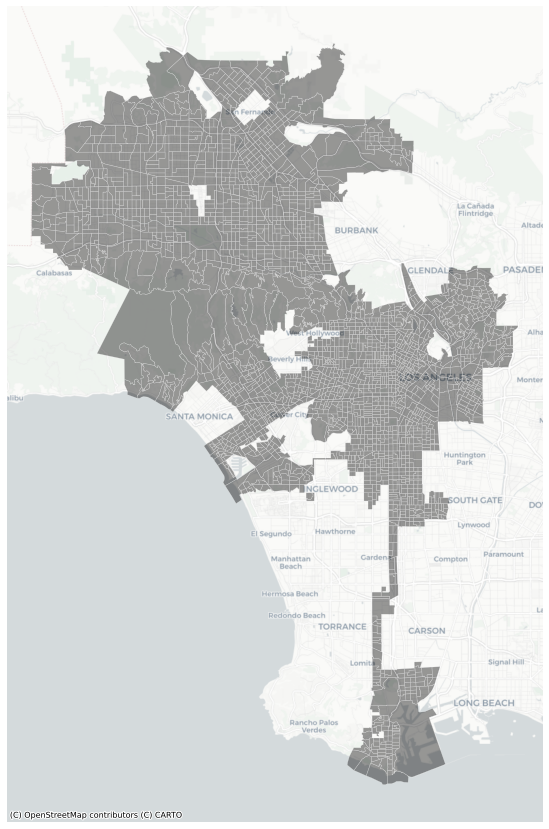

In [65]:
#plot it
fig, ax=plt.subplots(figsize=(15,15))
gdf.plot(ax=ax,
         color='black',
         edgecolor='white',
         lw=0.5,
         alpha=0.4
)
ax.axis('off') #no axis
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [66]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

results = client.get("amvf-fr72", 
                     limit=50000,
                     where = "arst_date between '2020-07-01T00:00:00' and '2021-01-31T00:00:00'",
                     order='arst_date desc')

# Convert to pandas DataFrame

In [67]:
# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

In [68]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           36631 non-null  object
 1   report_type      36631 non-null  object
 2   arst_date        36631 non-null  object
 3   time             36630 non-null  object
 4   area             36631 non-null  object
 5   area_desc        36631 non-null  object
 6   rd               36631 non-null  object
 7   age              36631 non-null  object
 8   sex_cd           36631 non-null  object
 9   descent_cd       36631 non-null  object
 10  chrg_grp_cd      34105 non-null  object
 11  grp_description  34100 non-null  object
 12  arst_typ_cd      36631 non-null  object
 13  charge           36631 non-null  object
 14  chrg_desc        34105 non-null  object
 15  dispo_desc       34460 non-null  object
 16  location         36631 non-null  object
 17  crsst            19215 non-null

In [69]:
arrests.head()

rpt_id report_type                arst_date  time area    area_desc  \
0    6116629     BOOKING  2021-01-31T00:00:00.000  2015   12  77th Street   
1  210905255         RFC  2021-01-31T00:00:00.000  2346   09     Van Nuys   
2    6116639     BOOKING  2021-01-31T00:00:00.000  1705   21      Topanga   
3  211905113         RFC  2021-01-31T00:00:00.000  1500   19      Mission   
4  210905254         RFC  2021-01-31T00:00:00.000  2247   09     Van Nuys   

     rd age sex_cd descent_cd  ...                   dispo_desc  \
0  1266  27      M          B  ...       FELONY COMPLAINT FILED   
1  0904  53      M          W  ...  MISDEMEANOR COMPLAINT FILED   
2  2136  22      M          H  ...  MISDEMEANOR COMPLAINT FILED   
3  1913  28      F          W  ...  MISDEMEANOR COMPLAINT FILED   
4  0904  27      M          H  ...  MISDEMEANOR COMPLAINT FILED   

                          location                            crsst      lat  \
0  83RD                         ST                         BROADWAY  33.9642   
1  SEPULVEDA                    BL                         COHASSET        0   
2  SHERMAN                      WY                          ALABAMA   34.201   
3                          BLEDSOE  SAN FERNANDO                 RD        0   
4  SEPULVEDA                    BL  COHASSET                     ST        0   

         lon                                         location_1  \
0  -118.2783  {'type': 'Point', 'coordinates': [-118.2783, 3...   
1          0           {'type': 'Point', 'coordinates': [0, 0]}   
2   -118.599  {'type': 'Point', 'coordinates': [-118.599, 34...   
3          0           {'type': 'Point', 'coordinates': [0, 0]}   
4          0           {'type': 'Point', 'coordinates': [0, 0]}   

                  bkg_date bkg_time       bgk_location bkg_loc_cd  
0  2021-01-31T00:00:00.000     2216            77TH ST       4212  
1                      NaN      NaN                NaN        NaN  
2  2021-01-31T00:00:00.000     2237  VALLEY - JAIL DIV       4279  
3                      NaN      NaN                NaN        NaN  
4                      NaN      NaN                NaN        NaN  

[5 rows x 25 columns]

In [70]:
from shapely import geometry
arrests=gpd.GeoDataFrame(arrests,crs='EPSG:4326',
                         geometry=gpd.points_from_xy(arrests.lon, arrests.lat))

In [71]:
# get the layers into a web mercator projection
# reproject to web mercator
arrests=arrests.to_crs(epsg=3857)

In [72]:
# convert lat/lon to floats
arrests.lon=arrests.lon.astype('float')
arrests.lat=arrests.lat.astype('float')

In [73]:
arrests.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

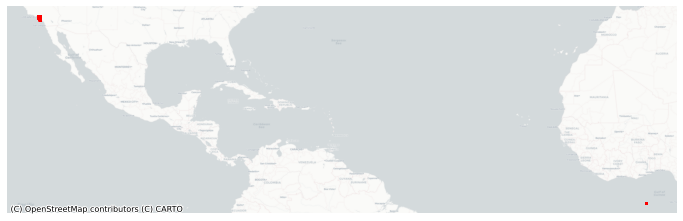

In [74]:
#map it
fig, ax=plt.subplots(figsize=(12,12))
arrests.plot(ax=ax,
             color='red',
             markersize=1)
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [75]:
# subset the zero coordinate records
arrests[arrests.lon==0]

rpt_id report_type                arst_date  time area  area_desc  \
1      210905255         RFC  2021-01-31T00:00:00.000  2346   09   Van Nuys   
3      211905113         RFC  2021-01-31T00:00:00.000  1500   19    Mission   
4      210905254         RFC  2021-01-31T00:00:00.000  2247   09   Van Nuys   
5      211105080         RFC  2021-01-31T00:00:00.000  1725   11  Northeast   
8      211105079         RFC  2021-01-31T00:00:00.000  1730   11  Northeast   
...          ...         ...                      ...   ...  ...        ...   
36505  202111263         RFC  2020-07-01T00:00:00.000  1630   21    Topanga   
36538  200212030         RFC  2020-07-01T00:00:00.000  1630   02    Rampart   
36539  202111265         RFC  2020-07-01T00:00:00.000  0940   21    Topanga   
36563  202111264         RFC  2020-07-01T00:00:00.000  1515   21    Topanga   
36587    5964196     BOOKING  2020-07-01T00:00:00.000  1745   08    West LA   

         rd age sex_cd descent_cd  ...  \
1      0904  53      M          W  ...   
3      1913  28      F          W  ...   
4      0904  27      M          H  ...   
5      1177  41      M          H  ...   
8      1177  43      M          H  ...   
...     ...  ..    ...        ...  ...   
36505  2138  44      M          H  ...   
36538  0237  46      F          W  ...   
36539  2146  71      M          H  ...   
36563  2146  31      M          H  ...   
36587  0899  20      M          H  ...   

                                      location  \
1              SEPULVEDA                    BL   
3                                      BLEDSOE   
4              SEPULVEDA                    BL   
5                                        HURON   
8                                        HURON   
...                                        ...   
36505          SHERMAN                      WY   
36538  1600    BEVERLY                      BL   
36539          SHERMAN                      WY   
36563  7100    REMMET                       AV   
36587                                 NATIONAL   

                                 crsst  lat  lon  \
1                             COHASSET  0.0  0.0   
3      SAN FERNANDO                 RD  0.0  0.0   
4      COHASSET                     ST  0.0  0.0   
5                            AVENUE 26  0.0  0.0   
8                            AVENUE 26  0.0  0.0   
...                                ...  ...  ...   
36505  MASON                        AV  0.0  0.0   
36538                              NaN  0.0  0.0   
36539  CANOGA                       AV  0.0  0.0   
36563                              NaN  0.0  0.0   
36587                          MANNING  0.0  0.0   

                                     location_1                 bkg_date  \
1      {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
3      {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
4      {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
5      {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
8      {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
...                                         ...                      ...   
36505  {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
36538  {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
36539  {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
36563  {'type': 'Point', 'coordinates': [0, 0]}                      NaN   
36587  {'type': 'Point', 'coordinates': [0, 0]}  2020-07-01T00:00:00.000   

      bkg_time bgk_location  bkg_loc_cd             geometry  
1          NaN          NaN         NaN  POINT (0.000 0.000)  
3          NaN          NaN         NaN  POINT (0.000 0.000)  
4          NaN          NaN         NaN  POINT (0.000 0.000)  
5          NaN          NaN         NaN  POINT (0.000 0.000)  
8          NaN          NaN         NaN  POINT (0.000 0.000)  
...        ...          ...         ...

In [76]:
# drop the unmapped rows
arrests = arrests[arrests.lon!=0]

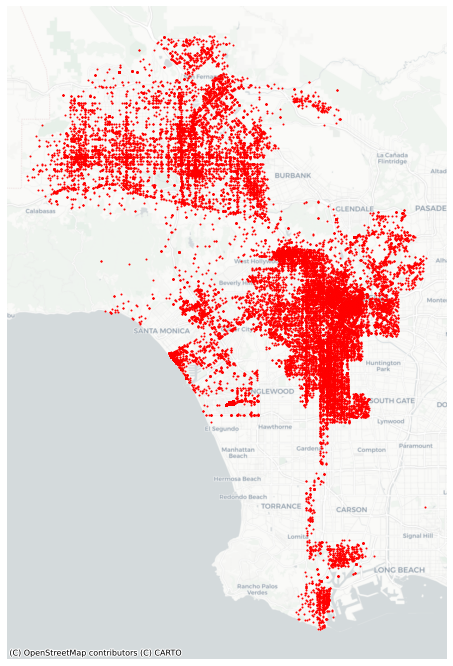

In [77]:
#map it again
fig, ax=plt.subplots(figsize=(12,12))
arrests.plot(ax=ax,
             color='red',
             markersize=1)
ax.axis('off')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
#create a two layer map
# get the bounding box for arrests

In [78]:
minx, miny, maxx, maxy=arrests.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13209304.360918792
3989446.5219156616
-13153165.941711744
4072862.5061257486


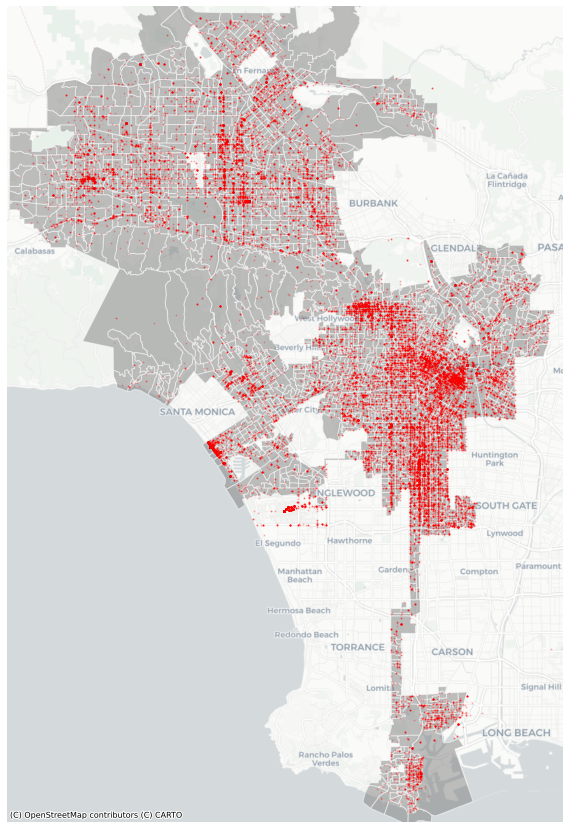

In [79]:
#sub plot for multilayer maps
fig,ax=plt.subplots(1,1, figsize=(15,15))
gdf.plot(ax=ax,
         color='gray',
         edgecolor='white',
         alpha=0.5
)
arrests.plot(ax=ax,
             color='red',
             markersize=1,
             alpha=0.2)
# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx-1000,maxx+1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny-1000,maxy+1000)
ax.axis('off')
# add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [80]:
# Do the spatial join
join=gpd.sjoin(arrests, gdf, how='left')
join.head()

rpt_id report_type                arst_date  time area    area_desc  \
0   6116629     BOOKING  2021-01-31T00:00:00.000  2015   12  77th Street   
2   6116639     BOOKING  2021-01-31T00:00:00.000  1705   21      Topanga   
6   6116641     BOOKING  2021-01-31T00:00:00.000  1330   06    Hollywood   
7   6116331     BOOKING  2021-01-31T00:00:00.000  0200   19      Mission   
10  6116168     BOOKING  2021-01-31T00:00:00.000  0005   19      Mission   

      rd age sex_cd descent_cd  ...       lon  \
0   1266  27      M          B  ... -118.2783   
2   2136  22      M          H  ... -118.5990   
6   0645  32      M          H  ... -118.3391   
7   1917  19      M          B  ... -118.4409   
10  1918  38      F          H  ... -118.4350   

                                           location_1  \
0   {'type': 'Point', 'coordinates': [-118.2783, 3...   
2   {'type': 'Point', 'coordinates': [-118.599, 34...   
6   {'type': 'Point', 'coordinates': [-118.3391, 3...   
7   {'type': 'Point', 'coordinates': [-118.4409, 3...   
10  {'type': 'Point', 'coordinates': [-118.435, 34...   

                   bkg_date bkg_time       bgk_location bkg_loc_cd  \
0   2021-01-31T00:00:00.000     2216            77TH ST       4212   
2   2021-01-31T00:00:00.000     2237  VALLEY - JAIL DIV       4279   
6   2021-01-31T00:00:00.000     2243          HOLLYWOOD       4206   
7   2021-01-31T00:00:00.000     0828  VALLEY - JAIL DIV       4279   
10  2021-01-31T00:00:00.000     0235  VALLEY - JAIL DIV       4279   

                             geometry index_right          FIPS  TotalPopu  
0   POINT (-13166680.128 4023995.973)      1956.0  060372397012     1959.0  
2   POINT (-13202380.289 4055823.453)       685.0  060371345202     2351.0  
6   POINT (-13173448.353 4042452.596)      1000.0  060371901002     1578.0  
7   POINT (-13184780.677 4070598.135)       110.0  060371064081     2896.0  
10  POINT (-13184123.892 4069978.208)        99.0  060371064031     1141.0  

[5 rows x 29 columns]

In [81]:
arrests_by_gdf=join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='arrests_count')

In [82]:
arrests_by_gdf.head()

FIPS  arrests_count
0  060372734022            419
1  060371282101            322
2  060372077101            270
3  060372260021            228
4  060372074001            225

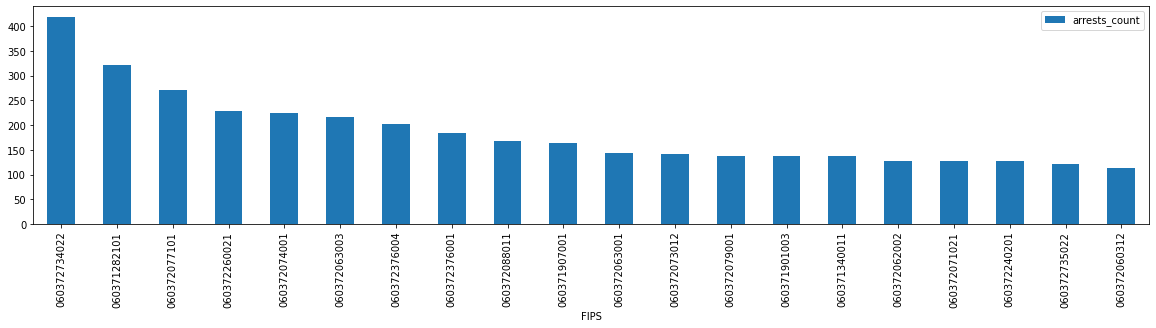

In [83]:
#bar chart of 20 geographies
arrests_by_gdf[:20].plot.bar(figsize=(20,4),
                             x='FIPS',
                             y='arrests_count')

In [84]:
# join value counts back to the gdf
gdf=gdf.merge(arrests_by_gdf, on='FIPS')

In [85]:
gdf.head()

FIPS  TotalPopu                                           geometry  \
0  060371011101     1688.0  MULTIPOLYGON (((-13168130.287 4063777.973, -13...   
1  060371011102     1614.0  MULTIPOLYGON (((-13169350.794 4063591.834, -13...   
2  060371011221     2156.0  MULTIPOLYGON (((-13169467.902 4065613.937, -13...   
3  060371011222     1249.0  MULTIPOLYGON (((-13168066.056 4064987.278, -13...   
4  060371012101     3047.0  MULTIPOLYGON (((-13168465.581 4062734.852, -13...   

   arrests_count  
0              2  
1             11  
2              2  
3              1  
4             17

In [ ]:
#normalizing

In [92]:
gdf.to_file('/content/drive/MyDrive/geopandas_exercise/gdf.geojson', driver="GeoJSON")  

In [93]:
gdf=gpd.read_file('/content/drive/MyDrive/geopandas_exercise/gdf.geojson')

In [94]:
gdf.head()

FIPS  TotalPopu  arrests_count  \
0  060371011101     1688.0              2   
1  060371011102     1614.0             11   
2  060371011221     2156.0              2   
3  060371011222     1249.0              1   
4  060371012101     3047.0             17   

                                            geometry  
0  MULTIPOLYGON (((-13168130.287 4063777.973, -13...  
1  MULTIPOLYGON (((-13169350.794 4063591.834, -13...  
2  MULTIPOLYGON (((-13169467.902 4065613.937, -13...  
3  MULTIPOLYGON (((-13168066.056 4064987.278, -13...  
4  MULTIPOLYGON (((-13168465.581 4062734.852, -13...

In [97]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FIPS           2337 non-null   object  
 1   TotalPopu      2337 non-null   float64 
 2   arrests_count  2337 non-null   int64   
 3   geometry       2337 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 73.2+ KB


In [98]:
gdf['arrests_per_1000']=gdf['arrests_count']/gdf['TotalPopu']*1000

In [99]:
gdf.sort_values(by='arrests_per_1000').tail()

FIPS  TotalPopu  arrests_count  \
1787  060372376001     1084.0            184   
1790  060372376004      924.0            203   
2335  060379800241      223.0             49   
2134  060372735022      386.0            121   
2130  060372734022      680.0            419   

                                               geometry  arrests_per_1000  
1787  MULTIPOLYGON (((-13167654.841 4026132.403, -13...        169.741697  
1790  MULTIPOLYGON (((-13167410.829 4025590.204, -13...        219.696970  
2335  MULTIPOLYGON (((-13193418.068 4053521.172, -13...        219.730942  
2134  MULTIPOLYGON (((-13189115.569 4026857.882, -13...        313.471503  
2130  MULTIPOLYGON (((-13189821.780 4027960.015, -13...        616.176471

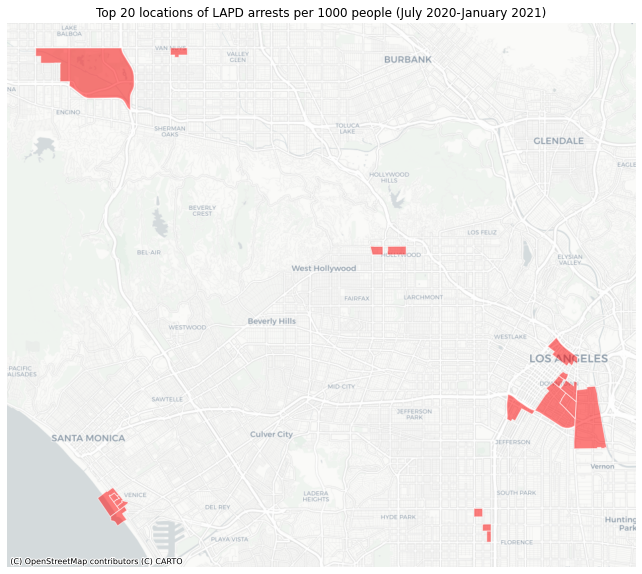

In [100]:
#map 
fig, ax=plt.subplots(figsize=(12,10))
gdf.sort_values(by='arrests_per_1000', ascending=False)[:20].plot(
    ax=ax,
    color='red',
    edgecolor='white',
    alpha=0.5,
    legend=True
)
#title 
ax.set_title('Top 20 locations of LAPD arrests per 1000 people (July 2020-January 2021)')
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
#chloropleth maps

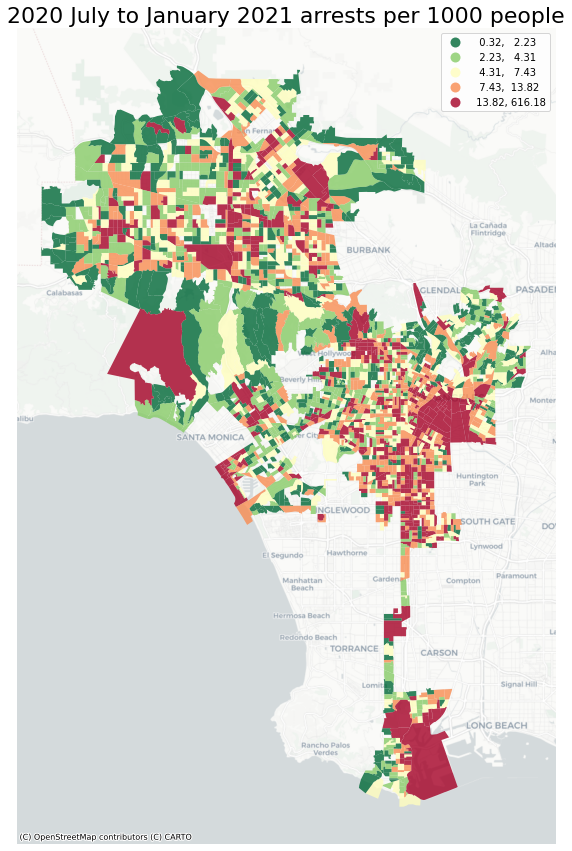

In [101]:
fig,ax=plt.subplots(figsize=(15,15))
gdf.plot(ax=ax,
         column='arrests_per_1000',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r', # a diverging color scheme
         scheme='quantiles') 
ax.axis('off')
ax.set_title('2020 July to January 2021 arrests per 1000 people', fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Global spatial autocorrelation

In [102]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(gdf,k=8)

# Row-standardization
wq.transform = 'r'

In [103]:
# create a new column for the spatial lag
gdf['arrests_per_1000_lag']=lps.weights.lag_spatial(wq, gdf['arrests_per_1000'])

In [104]:
# sample gives us 10 random rows
gdf.sample(10)[['TotalPopu','arrests_count','arrests_per_1000','arrests_per_1000_lag']]

TotalPopu  arrests_count  arrests_per_1000  arrests_per_1000_lag
1069     1047.0              3          2.865330              8.860229
201      2052.0              9          4.385965              4.845511
1011     1459.0              1          0.685401              9.762096
1192     3271.0             47         14.368695             46.159436
629      1387.0              2          1.441961             11.590649
2211     1883.0             16          8.497079              8.785798
28       1863.0             11          5.904455             12.737696
851       969.0              1          1.031992              3.871768
1345      420.0              1          2.380952              5.703276
941      1130.0            163        144.247788             32.864430

## Donut and diamond

In [105]:
# create a column that calculates the difference betwen arrests and lag
gdf['arrest_lag_diff']=gdf['arrests_per_1000']-gdf['arrests_per_1000_lag']

In [106]:
# output to get the head and tail
gdf.sort_values(by='arrest_lag_diff')

FIPS  TotalPopu  arrests_count  \
2147  060372739022     1030.0              8   
1788  060372376002     1020.0             15   
2131  060372734023      674.0             70   
1789  060372376003     1073.0             20   
1833  060372393103     1282.0              4   
...            ...        ...            ...   
1787  060372376001     1084.0            184   
1790  060372376004      924.0            203   
2134  060372735022      386.0            121   
2335  060379800241      223.0             49   
2130  060372734022      680.0            419   

                                               geometry  arrests_per_1000  \
2147  MULTIPOLYGON (((-13188028.423 4026791.427, -13...          7.766990   
1788  MULTIPOLYGON (((-13167656.845 4025515.165, -13...         14.705882   
2131  MULTIPOLYGON (((-13188866.770 4027756.604, -13...        103.857567   
1789  MULTIPOLYGON (((-13167166.705 4025522.146, -13...         18.639329   
1833  MULTIPOLYGON (((-13166680.017 4025524.562, -13...          3.120125   
...                                                 ...               ...   
1787  MULTIPOLYGON (((-13167654.841 4026132.403, -13...        169.741697   
1790  MULTIPOLYGON (((-13167410.829 4025590.204, -13...        219.696970   
2134  MULTIPOLYGON (((-13189115.569 4026857.882, -13...        313.471503   
2335  MULTIPOLYGON (((-13193418.068 4053521.172, -13...        219.730942   
2130  MULTIPOLYGON (((-13189821.780 4027960.015, -13...        616.176471   

      arrests_per_1000_lag  arrest_lag_diff  
2147             73.521154       -65.754164  
1788             67.953012       -53.247129  
2131            151.678364       -47.820798  
1789             63.407279       -44.767950  
1833             46.878403       -43.758278  
...                    ...              ...  
1787             43.768042       125.973655  
1790             42.329126       177.367844  
2134            134.985836       178.485667  
2335              4.023911       215.707030  
2130             94.890860       521.285611  

[2337 rows x 7 columns]

In [108]:
# the FIPS with highest negative difference
gdf_donut=gdf.sort_values(by='arrest_lag_diff').head(1)
gdf_donut

FIPS  TotalPopu  arrests_count  \
2147  060372739022     1030.0              8   

                                               geometry  arrests_per_1000  \
2147  MULTIPOLYGON (((-13188028.423 4026791.427, -13...           7.76699   

      arrests_per_1000_lag  arrest_lag_diff  
2147             73.521154       -65.754164

In [111]:
# the FIPS with highest positive difference
gdf_diamond=gdf.sort_values(by='arrest_lag_diff').tail(1)
gdf_diamond

FIPS  TotalPopu  arrests_count  \
2130  060372734022      680.0            419   

                                               geometry  arrests_per_1000  \
2130  MULTIPOLYGON (((-13189821.780 4027960.015, -13...        616.176471   

      arrests_per_1000_lag  arrest_lag_diff  
2130              94.89086       521.285611

## spatial lag map

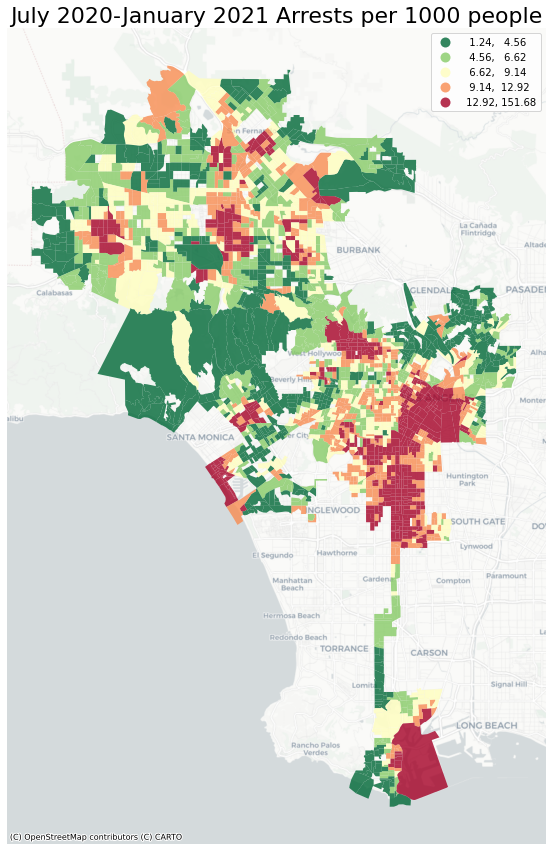

In [113]:
# use subplots that make it easier to create multiple layered maps
fig, ax=plt.subplots(1,1, figsize=(15,15))
gdf.plot(ax=ax,
         figsize= (15,15),
         column='arrests_per_1000_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles'
         )
ax.axis('off')
ax.set_title('July 2020-January 2021 Arrests per 1000 people', fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## side by side maps

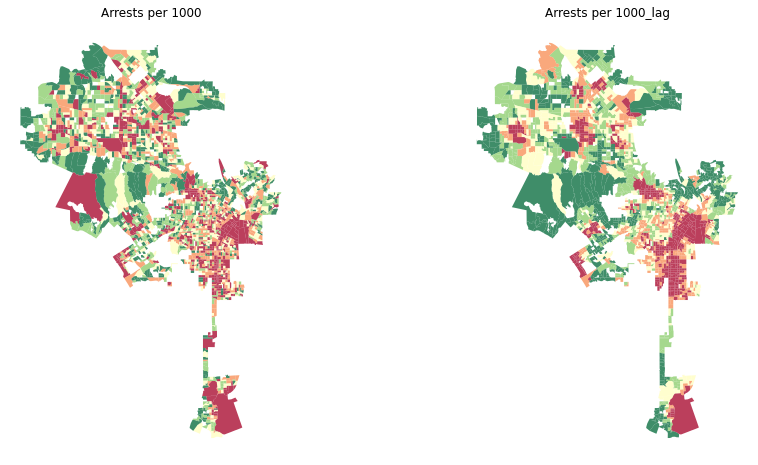

In [114]:
fig, ax=plt.subplots(1,2, figsize=(15,8)) # 1 row, 2 columns
# two subplots produces ax[0] (left) and ax[1] (right)
gdf.plot(ax=ax[0], # this assigns the map to the left subplot
         figsize= (15,15),
         column='arrests_per_1000',
         cmap='RdYlGn_r',
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0,
          alpha=0.75, 
         )
ax[0].axis('off')
ax[0].set_title('Arrests per 1000')

gdf.plot(ax=ax[1], # # this assigns the map to the right subplot
         figsize= (15,15),
         column='arrests_per_1000_lag',
         cmap='RdYlGn_r',
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0,
          alpha=0.75, 
         )

ax[1].axis('off')
ax[1].set_title('Arrests per 1000_lag')
plt.show()

# Global autocorrelation Morans I

In [115]:
y = gdf.arrests_per_1000
moran = Moran(y, wq)
moran.I

0.2584831228857892

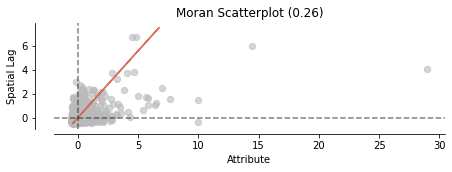

In [116]:
fig, ax= moran_scatterplot(moran, aspect_equal=True)
plt.show()

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff053e6cc50>)

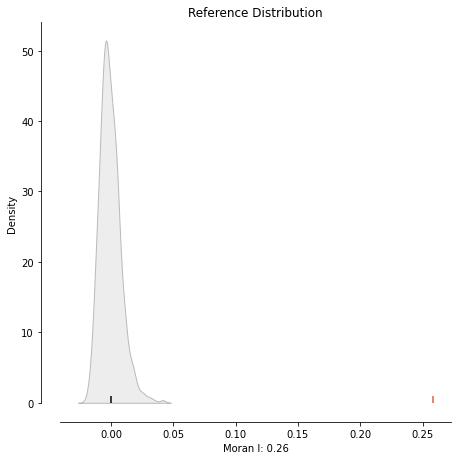

In [117]:
plot_moran_simulation(moran,aspect_equal=False)

In [118]:
moran.p_sim

0.001

## local spatial autocorrelation

In [119]:
# calculate local moran values
lisa = esda.moran.Moran_Local(y, wq)

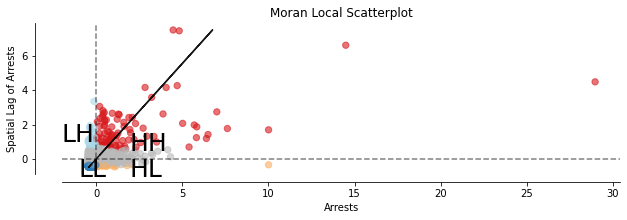

In [120]:
# Plot
fig, ax=plt.subplots(figsize=(10,15))
moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel('Arrests')
ax.set_ylabel('Spatial Lag of Arrests')

#add some labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

# Spatial autocorrelation map

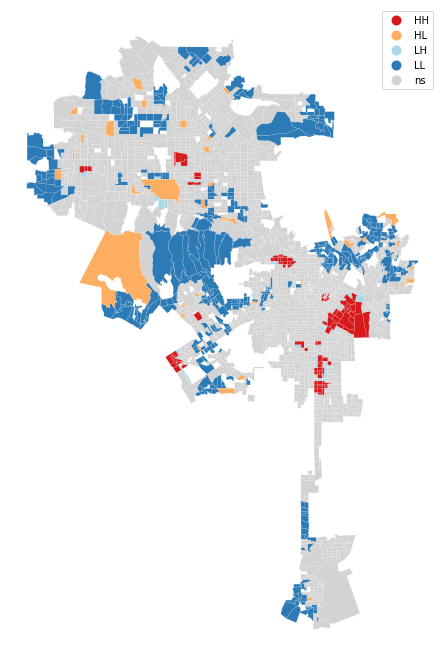

In [121]:
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(lisa, gdf, p=0.05, ax=ax)
plt.show()

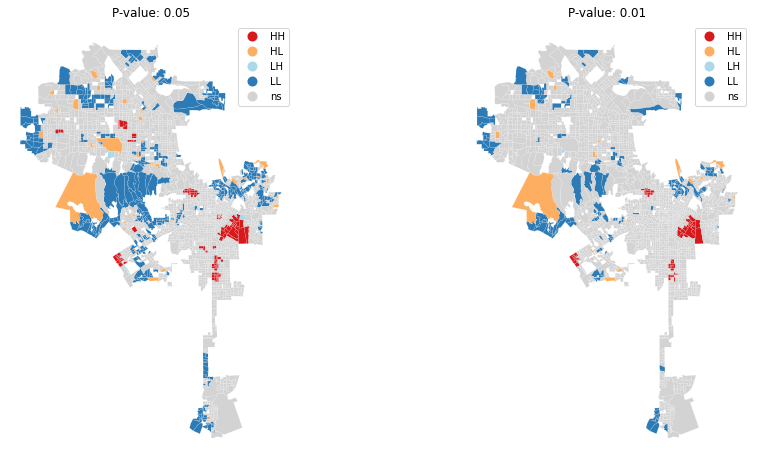

In [122]:
# Slide Type And create a map comparing different p-values 
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# regular count map on the left
lisa_cluster(lisa, gdf, p=0.05, ax=ax[0])

ax[0].axis("off")
ax[0].set_title("P-value: 0.05")

# spatial lag map on the right
lisa_cluster(lisa, gdf, p=0.01, ax=ax[1])
ax[1].axis("off")
ax[1].set_title("P-value: 0.01")

plt.show()
